In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import scipy
from scipy import stats

In [2]:
df_cons = pd.read_csv('/hpc/compgen/projects/gw_cfdna/snv_qs/predict_cyclclean_with_lambdamodel/cycl_clean_consensus_scoreperread/cycl_clean_consensus_properties_per_read.csv')
df_cons['region_readid'] = df_cons['region'] + '_' + df_cons['cons-readid-short']
print(df_cons.shape)
print(list(df_cons.columns))


(443133, 10)
['region', 'cons-readid', 'cons-readid-short', 'cons-NM', 'cons-YM', 'cons-YR', 'cons-align_length', 'cons-cigar', 'cons-score', 'region_readid']


In [3]:
df_pred = pd.read_csv('/hpc/compgen/projects/gw_cfdna/snv_qs/nanopore-wgs/scripts/cyclomics_clean_predict_maskedrefbase/analyse_perread/cycl_clean_predict_t2t_perread.csv')
print(df_pred.shape)
print(list(df_pred.columns))
print(df_pred.head(1))

print(df_pred['pred-model-cov'].unique())
print(df_pred['pred-read-cov'].unique())

(1998038, 10)
['region', 'region_readid', 'pred-readid', 'pred-readid-short', 'pred-NM', 'pred-align_length', 'pred-cigar', 'pred-score', 'pred-model-cov', 'pred-read-cov']
    region                                 region_readid  \
0  region1  region1_000dee72-385a-522e-bd98-1e5b0485e10f   

                            pred-readid                     pred-readid-short  \
0  000dee72-385a-522e-bd98-1e5b0485e10f  000dee72-385a-522e-bd98-1e5b0485e10f   

   pred-NM  pred-align_length pred-cigar  pred-score pred-model-cov  \
0        0                 98      4S98M         0.0           c100   

  pred-read-cov  
0            5X  
['c100' 'c15' 'c5' 'c10' 'c20']
['5X' '9X' '16X' '10X' '14X' '8X' '6X' '7X' '15X' '20X' '12X' '4X' '17X'
 '11X' '13X' '19X' '3X' '18X' '20+X']


In [4]:
print(f"number of rows where region is unknown: {df_pred.loc[ (df_pred['region'] == 'region_unknown') ].shape[0]}")

number of rows where region is unknown: 10


In [36]:
df_cons_copy = df_cons.copy()
df_cons_copy['pred-model-cov'] = 'Cycas Consensus'
df_cons_copy['pred-read-cov'] = 'Cycas Consensus'
print(f'original shape of cons: {df_cons_copy.shape}')
print(f'original shape of pred: {df_pred.shape}')

print(list(df_cons_copy.columns))
print(list(df_pred.columns))

df_cons_small = df_cons_copy[['region_readid', 'pred-model-cov', 'pred-read-cov', 'cons-score', 'cons-YR']]
df_pred_small = df_pred[['region_readid', 'pred-model-cov', 'pred-read-cov', 'pred-score']]
df_cons_small = df_cons_small.rename(columns={'cons-score': 'score'})
df_pred_small = df_pred_small.rename(columns={'pred-score': 'score'})
print(df_cons_small.shape)
print(df_pred_small.shape)

cons_names =  df_cons_small['region_readid'].tolist()
print(f'number of reads in consensus: {len(cons_names)}')
print(f'number of unique reads in consensus: {len(set(cons_names))}')
pred_names =  df_pred_small['region_readid'].tolist()
print(f'number of reads in prediction: {len(pred_names)}')
print(f'number of unique reads in prediction: {len(set(pred_names))}')

df_cons_select = df_cons_small[df_cons_small['region_readid'].isin(pred_names)]
print(df_cons_select.shape)

df_pred_select = df_pred_small[df_pred_small['region_readid'].isin(cons_names)]
print(df_pred_select.shape)



df_concat = pd.concat([df_cons_select, df_pred_select])

print(df_concat.shape)
print(df_concat.columns)
print(df_concat.head())
print(df_concat.tail())

original shape of cons: (443133, 12)
original shape of pred: (1998038, 10)
['region', 'cons-readid', 'cons-readid-short', 'cons-NM', 'cons-YM', 'cons-YR', 'cons-align_length', 'cons-cigar', 'cons-score', 'region_readid', 'pred-model-cov', 'pred-read-cov']
['region', 'region_readid', 'pred-readid', 'pred-readid-short', 'pred-NM', 'pred-align_length', 'pred-cigar', 'pred-score', 'pred-model-cov', 'pred-read-cov']
(443133, 5)
(1998038, 4)
number of reads in consensus: 443133
number of unique reads in consensus: 440938
number of reads in prediction: 1998038
number of unique reads in prediction: 397643
(381288, 5)
(1897834, 4)
(2279122, 5)
Index(['region_readid', 'pred-model-cov', 'pred-read-cov', 'score', 'cons-YR'], dtype='object')
                                  region_readid   pred-model-cov  \
1  region1_e911b4cc-7239-528c-af99-502c7e6a2bba  Cycas Consensus   
2  region1_c7689329-244f-52ed-b830-23b405b66c57  Cycas Consensus   
3  region1_0e7882fc-ac08-40b8-be2e-e25ffa42ef8d  Cycas Co

In [6]:
cov_list = ['c5', 'c10', 'c15', 'c20', 'c100']
for cov in cov_list:
    # print(cov)
    # print('region1', df_pred.loc[(df_pred['region'] == 'region1') & (df_pred['pred-model-cov'] == cov) ].shape[0])
    # print('region2', df_pred.loc[(df_pred['region'] == 'region2') & (df_pred['pred-model-cov'] == cov) ].shape[0])
    # print('region3', df_pred.loc[(df_pred['region'] == 'region3') & (df_pred['pred-model-cov'] == cov) ].shape[0])
    # print('region4', df_pred.loc[(df_pred['region'] == 'region4') & (df_pred['pred-model-cov'] == cov) ].shape[0])
    # print('region5', df_pred.loc[(df_pred['region'] == 'region5') & (df_pred['pred-model-cov'] == cov) ].shape[0])
    # print('region unknown', df_pred.loc[(df_pred['region'] == 'region_unknown') & (df_pred['pred-model-cov'] == cov) ].shape[0])
    print(cov, 'total',  df_pred.loc[ (df_pred['pred-model-cov'] == cov) ].shape[0])

c5 total 399610
c10 total 399609
c15 total 399605
c20 total 399605
c100 total 399609


In [47]:
print('c5')
df_pred_c5 = df_pred[df_pred['pred-model-cov'] == 'c5']
print(df_pred_c5.shape)
df_merged_c5 = df_cons.merge(df_pred_c5)
print(df_merged_c5.shape)

print('c10')
df_pred_c10 = df_pred[df_pred['pred-model-cov'] == 'c10']
print(df_pred_c10.shape)
df_merged_c10 = df_cons.merge(df_pred_c10)
print(df_merged_c10.shape)

print('c15')
df_pred_c15 = df_pred[df_pred['pred-model-cov'] == 'c15']
print(df_pred_c15.shape)
df_merged_c15 = df_cons.merge(df_pred_c15)
print(df_merged_c15.shape)

print('c20')
df_pred_c20 = df_pred[df_pred['pred-model-cov'] == 'c20']
print(df_pred_c20.shape)
df_merged_c20 = df_cons.merge(df_pred_c20)
print(df_merged_c20.shape)

print('c100')
df_pred_c100 = df_pred[df_pred['pred-model-cov'] == 'c100']
print(df_pred_c100.shape)
df_merged_c100 = df_cons.merge(df_pred_c100)
print(df_merged_c100.shape)
print(df_merged_c100.columns)

c5
(399610, 10)
(381354, 18)
c10
(399609, 10)
(381354, 18)
c15
(399605, 10)
(381354, 18)
c20
(399605, 10)
(381353, 18)
c100
(399609, 10)
(381354, 18)
Index(['region', 'cons-readid', 'cons-readid-short', 'cons-NM', 'cons-YM',
       'cons-YR', 'cons-align_length', 'cons-cigar', 'cons-score',
       'region_readid', 'pred-readid', 'pred-readid-short', 'pred-NM',
       'pred-align_length', 'pred-cigar', 'pred-score', 'pred-model-cov',
       'pred-read-cov'],
      dtype='object')


In [8]:
print(list(df_pred.columns))

['region', 'region_readid', 'pred-readid', 'pred-readid-short', 'pred-NM', 'pred-align_length', 'pred-cigar', 'pred-score', 'pred-model-cov', 'pred-read-cov']


<Figure size 432x288 with 0 Axes>

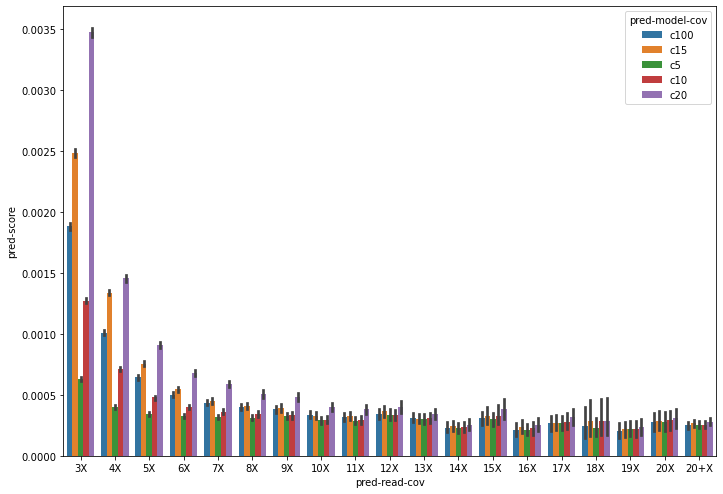

In [39]:
coverage = ['3X','4X','5X','6X','7X','8X','9X','10X','11X','12X','13X','14X','15X','16X','17X','18X','19X','20X','20+X']

plt.figure(1)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=df_pred, x='pred-read-cov', hue='pred-model-cov', y ='pred-score', order=coverage)
plt.show()



<Figure size 432x288 with 0 Axes>

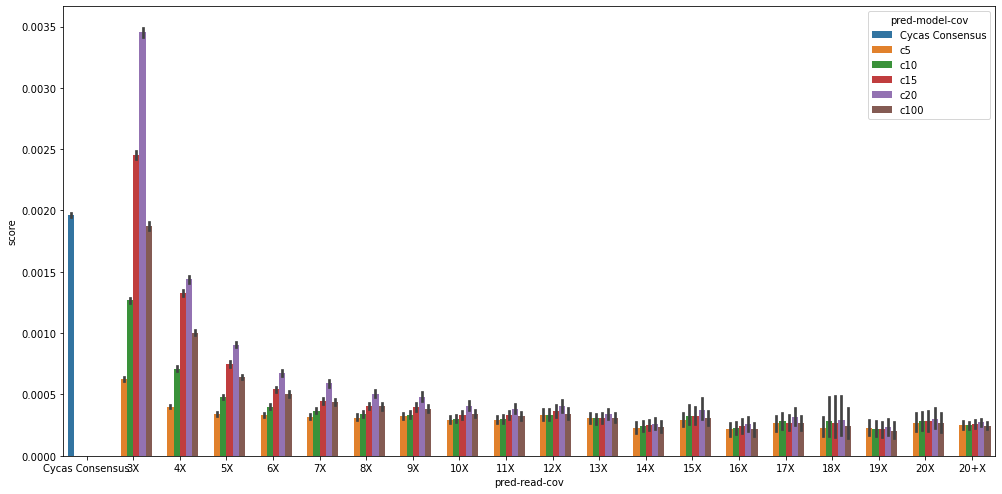

In [40]:
coverage = ['Cycas Consensus', '3X','4X','5X','6X','7X','8X','9X','10X','11X','12X','13X','14X','15X','16X','17X','18X','19X','20X','20+X']
hue_order = ['Cycas Consensus', 'c5', 'c10', 'c15', 'c20', 'c100']

plt.figure(2)
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=df_concat, x='pred-read-cov', hue='pred-model-cov', y ='score', order=coverage, hue_order=hue_order)
plt.show()

Index(['region_readid', 'pred-model-cov', 'pred-read-cov', 'score', 'cons-YR'], dtype='object')
                                  region_readid   pred-model-cov  \
1  region1_e911b4cc-7239-528c-af99-502c7e6a2bba  Cycas Consensus   

     pred-read-cov     score cons-YR  
1  Cycas Consensus  0.009524       F  


<Figure size 432x288 with 0 Axes>

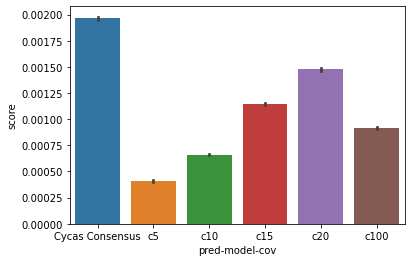

In [42]:
print(df_concat.columns)
print(df_concat.head(1))
column_order = ['Cycas Consensus', 'c5', 'c10', 'c15', 'c20', 'c100']
plt.figure(3)
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots()    # figsize=a4_dims
sns.barplot(data=df_concat, x='pred-model-cov', y ='score', order=column_order)
plt.show()

In [46]:

l = list(df_concat['region_readid'])
print(len(l))
# print(len(set(l)))
print(df_concat.columns)

df_concat = df_concat.drop_duplicates(['region_readid', 'pred-model-cov'])
print(len(df_concat[df_concat['pred-model-cov']=='Cycas Consensus']['region_readid']))
print(len(df_concat[df_concat['pred-model-cov']=='c5']['region_readid']))
print(len(df_concat[df_concat['pred-model-cov']=='c10']['region_readid']))
print(len(df_concat[df_concat['pred-model-cov']=='c15']['region_readid']))
print(len(df_concat[df_concat['pred-model-cov']=='c20']['region_readid']))
print(len(df_concat[df_concat['pred-model-cov']=='c100']['region_readid']))
print(len(df_concat['region_readid']))


# l = list(df_concat['region_readid'])
# print(len(l))
# print(len(set(l)))

df_pivot = df_concat.pivot(index='region_readid', columns=['pred-model-cov'], values=['score']).reset_index().rename_axis(None, axis=1)
print(df_pivot.head(1))

print(df_pivot.columns)

print(len(df_pivot['Cycas Consensus']))
print(len(df_pivot['c5']))
print(len(df_pivot['c10']))
print(len(df_pivot['c15']))
print(len(df_pivot['c20']))
print(len(df_pivot['c100']))

# # print(df_pivot[df_pivot['c20'].apply(lambda x: not isfloat(x))])

# print(f'shapiro test to test normality distribution for consensus scores: {stats.shapiro(df_pivot["Cycas Consensus"])}')    # this value is lower than 0.05 = significant = there is no normal distribution
# print(f'shapiro test to test normality distribution for prediction scores: {stats.shapiro(df_pivot["c5"])}') 
# print(f'shapiro test to test normality distribution for prediction scores: {stats.shapiro(df_pivot["c10"])}') 
# print(f'shapiro test to test normality distribution for prediction scores: {stats.shapiro(df_pivot["c15"])}') 
# print(f'shapiro test to test normality distribution for prediction scores: {stats.shapiro(df_pivot["c20"])}') 
# print(f'shapiro test to test normality distribution for prediction scores: {stats.shapiro(df_pivot["c100"])}') 

# column_order = ['Cycas Consensus', 'c5', 'c10', 'c15', 'c20', 'c100']

# plt.figure(5)
# ax = sns.boxplot(data=df_concat, x='pred-model-cov', y ='score', order=column_order)
# add_stat_annotation(ax, data=df_concat, x='pred-model-cov', y ='score', box_pairs = [('Cycas Consensus', 'c5')], test='Wilcoxon', text_format='simple', loc='outside', order=column_order)
# plt.show()



# print(stats.wilcoxon(df_merged['pred-score'], df_merged['cons-score']))

# for col in df_pivot.columns:
#     print(col, df_pivot[col].mean())


2277005
Index(['region_readid', 'pred-model-cov', 'pred-read-cov', 'score', 'cons-YR'], dtype='object')
379501
379501
379501
379501
379500
379501
2277005


TypeError: Must pass list-like as `names`.